# Drug Sentiment Analysis
### Dataset:
Dataset for drug sentiment  with Medicine, disease, tweet about the adverse effect of medicine for a disease and the sentiment(0,1,2).

### Data Exploration

In [1]:
%%capture
!pip install wordcloud matplotlib nltk

In [2]:
#Importing Libraries
import pandas as pd #handling csv files
import numpy as np  #handling numerical vector calculations
import matplotlib.pyplot as plt #Data Vizualisation
import seaborn as sns  #Data Visualisations
from wordcloud import WordCloud #Wordcloud visualisations
import warnings
warnings.filterwarnings("ignore")

In [3]:
df =  pd.read_excel("/content/Updated_Dataset_06012022.xlsx")
df.head()

uniqueID    drugName            condition  \
0      1000       Mobic       Osteoarthritis   
1       111   Meloxicam       Osteoarthritis   
2        11   Orthovisc       Osteoarthritis   
3       111  Infliximab  Psoriatic Arthritis   
4       110    Euflexxa       Osteoarthritis   

                                              review  Sentiment  
0  "Reduced my pain by 1% and lets me live a norm...          0  
1  "I have been using Mobic to relieve the pain f...          0  
2  "This is my third round of orthovisc. My great...          1  
3  "I have severe psoriatic arthritis and I&#001;...          0  
4  "After 0 years of astounding results from Supa...          0

In [4]:
#dropping uniqueID column - since it is not needed for the above analysis
df = df.drop(columns=["uniqueID"])

print("Columns:",df.columns)

Columns: Index(['drugName', 'condition', 'review', 'Sentiment'], dtype='object')


In [5]:
#Dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25845 entries, 0 to 25844
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   drugName   25845 non-null  object
 1   condition  25845 non-null  object
 2   review     25845 non-null  object
 3   Sentiment  25845 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 807.8+ KB
None


Class Distribution:
0    14859
1    10986
Name: Sentiment, dtype: int64



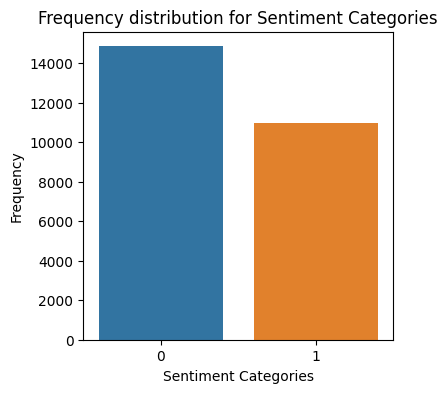

In [ ]:
#Class distribution analysis
print("Class Distribution:")
print(df["Sentiment"].value_counts())
print()
plt.figure(figsize=(4,4))
sns.barplot(x=df["Sentiment"].value_counts().index,y=df["Sentiment"].value_counts().values)
plt.xlabel("Sentiment Categories")
plt.ylabel("Frequency")
plt.title("Frequency distribution for Sentiment Categories")
plt.show()

Top 5 Drug Distribution:
Bupropion         788
Sertraline        695
Venlafaxine       625
Lamotrigine       614
Desvenlafaxine    584
Name: drugName, dtype: int64



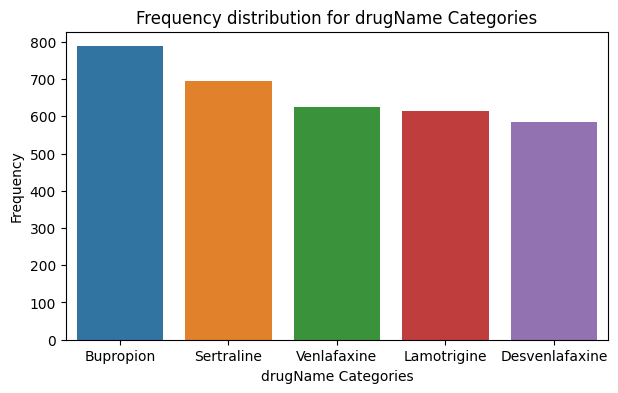

In [ ]:
#Top 5 Drug Names being sold
print("Top 5 Drug Distribution:")
print(df["drugName"].value_counts()[:5])
print()
plt.figure(figsize=(7,4))
sns.barplot(x=df["drugName"].value_counts().index[:5],y=df["drugName"].value_counts().values[:5])
plt.xlabel("drugName Categories")
plt.ylabel("Frequency")
plt.title("Frequency distribution for drugName Categories")
plt.show()

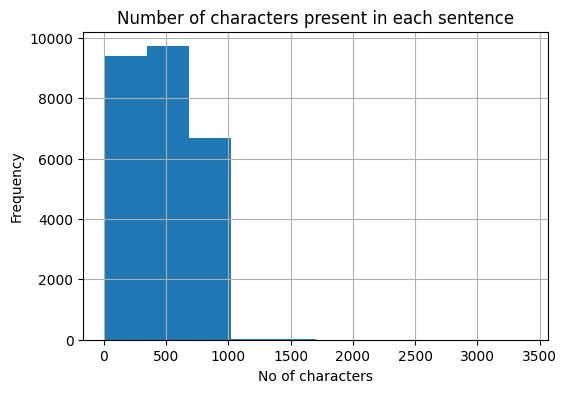

In [ ]:
#Text analysis -  Number of characters present in each sentence
plt.figure(figsize=(6,4))
df['review'].str.len().hist()
plt.title("Number of characters present in each sentence")
plt.xlabel("No of characters")
plt.ylabel("Frequency")
plt.show()

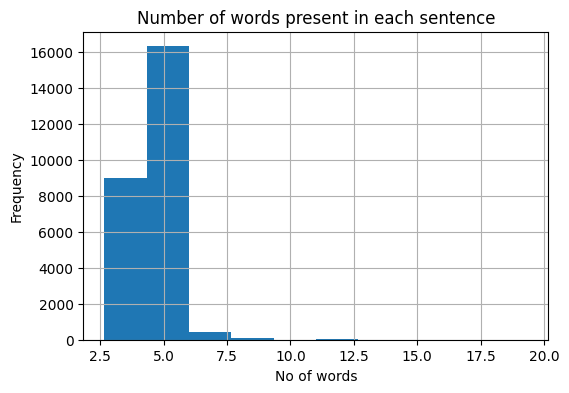

In [ ]:
#Text analysis -  Number of words present in each sentence
plt.figure(figsize=(6,4))
df['review'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title("Number of words present in each sentence")
plt.xlabel("No of words")
plt.ylabel("Frequency")
plt.show()

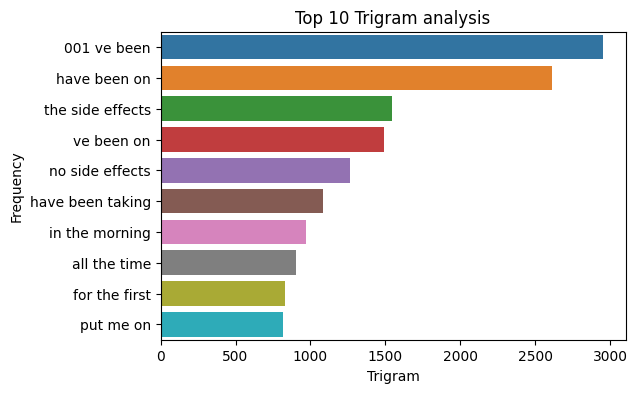

In [ ]:
#Text anakysis - n gram analaysis
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_tri_grams=get_top_ngram(df['review'],n=3)
x,y=map(list,zip(*top_tri_grams))
plt.figure(figsize=(6,4))
sns.barplot(x=y,y=x)
plt.title("Top 10 Trigram analysis")
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.show()

Top 5 Medical Condition:
Depression             12164
Bipolar Disorder        5604
Diabetes, Type 0        3547
Osteoarthritis          1626
Underactive Thyroid      567
Name: condition, dtype: int64



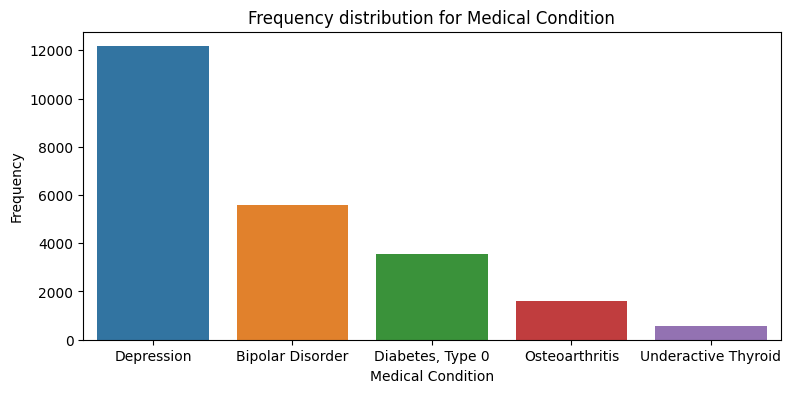

In [ ]:
#Top 5 Condition
print("Top 5 Medical Condition:")
print(df["condition"].value_counts()[:5])
print()
plt.figure(figsize=(9,4))
sns.barplot(x=df["condition"].value_counts().index[:5],y=df["condition"].value_counts().values[:5])
plt.xlabel("Medical Condition")
plt.ylabel("Frequency")
plt.title("Frequency distribution for Medical Condition")
plt.show()

In [ ]:
#Top 5 condition drug analysis
# Count occurrences of each condition for each drugName
count_df = df.groupby(["drugName", "condition"]).size().reset_index(name='count')

# Find the index of the maximum count for each drugName
max_count_indices = count_df.groupby('condition')['count'].idxmax()

# Filter the original DataFrame to get the rows with the maximum count for each drugName
print(count_df.loc[max_count_indices].sort_values(by='count',ascending=False)[:5].reset_index()[['drugName','condition','count']])

             drugName            condition  count
0           Bupropion           Depression    747
1         Lamotrigine     Bipolar Disorder    549
2         Liraglutide     Diabetes, Type 0    362
3       Levothyroxine  Underactive Thyroid    226
4  Sodium hyaluronate       Osteoarthritis    160


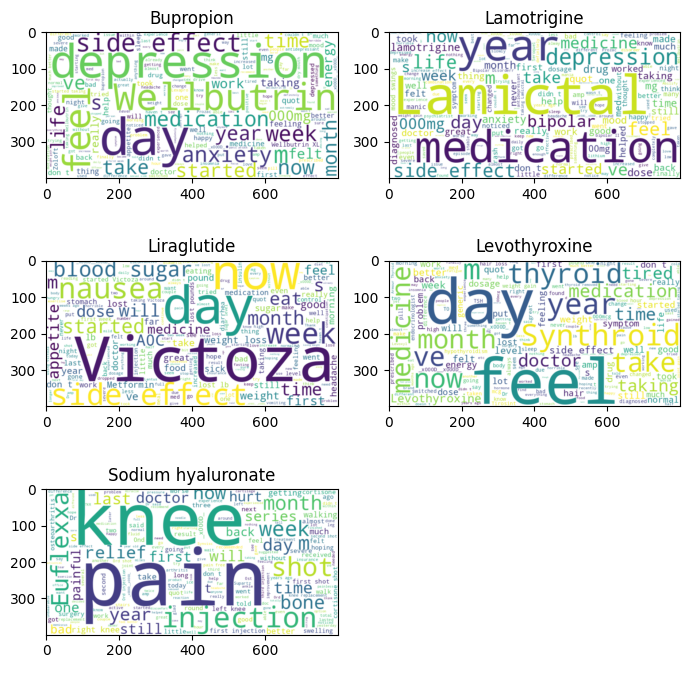

In [ ]:
#Word Cloud level analysis for Top 5 drug condition pair

top_5_drug_condition = ['Bupropion','Lamotrigine','Liraglutide','Levothyroxine','Sodium hyaluronate']
fig,axs = plt.subplots(3,2,figsize=(7, 7))
r,c=  0,0
for drug in top_5_drug_condition:
  txt = " ".join(df[df['drugName']==drug]['review'].values)
  # Create a WordCloud object
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(txt)

  # Display the WordCloud using matplotlib
  axs[r%3,c%2].imshow(wordcloud, interpolation='bilinear')
  axs[r%3,c%2].set_title(drug)

  c+=1
  if c%2==0 and c>0:
    r+=1
  else:
    continue

axs[2,1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
positive_sentiment_drug_condition = {}
negative_sentiment_drug_condition = {}

conditions = list(set(df['condition'].values))

for cdn in conditions:
  drugs = list(set(df[df['condition']==cdn]['drugName'].values))

  for drg in drugs:
    pos = len(df[(df['condition']==cdn)&(df['drugName']==drg)&(df['Sentiment']==1)])
    neg = len(df[(df['condition']==cdn)&(df['drugName']==drg)&(df['Sentiment']==0)])

    if pos>neg and len(positive_sentiment_drug_condition)<5:
      if cdn not in positive_sentiment_drug_condition:
        positive_sentiment_drug_condition[cdn] = [drg]
      else:
        positive_sentiment_drug_condition[cdn].append(drg)
    elif neg>=pos and len(negative_sentiment_drug_condition)<5:
      if cdn not in positive_sentiment_drug_condition:
        if cdn not in negative_sentiment_drug_condition:
          negative_sentiment_drug_condition[cdn] = [drg]
        else:
          negative_sentiment_drug_condition[cdn].append(drg)
    else:
      continue

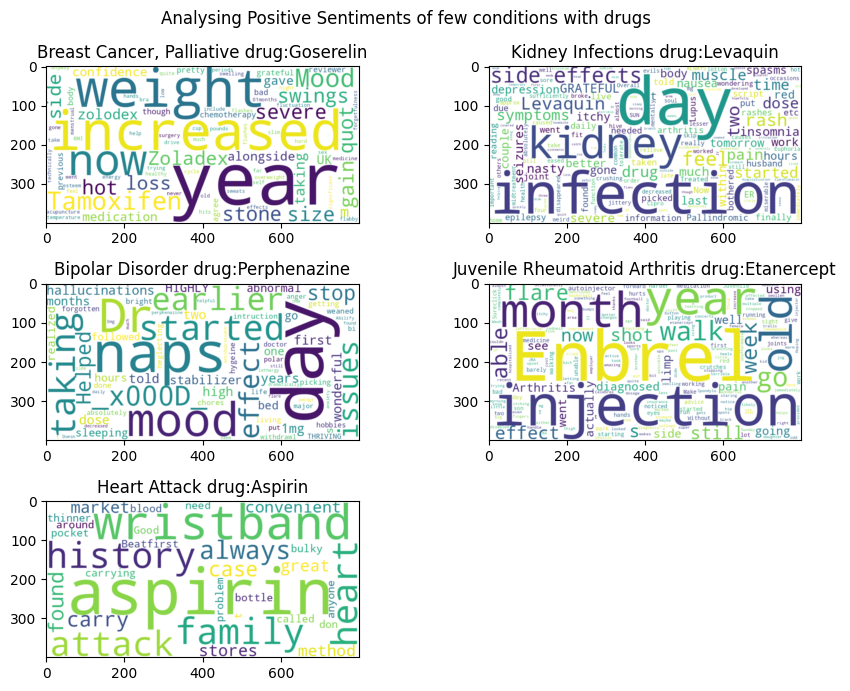

In [ ]:
fig,axs = plt.subplots(3,2,figsize=(9, 7))
r,c=  0,0
for cdn in positive_sentiment_drug_condition:
  txt = " ".join(df[(df['drugName']==positive_sentiment_drug_condition[cdn][0])&(df['condition']==cdn)&(df['Sentiment']==1)]['review'].values)
  # Create a WordCloud object
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(txt)

  # Display the WordCloud using matplotlib
  axs[r%3,c%2].imshow(wordcloud, interpolation='bilinear')
  title = cdn+" drug:"+positive_sentiment_drug_condition[cdn][0]
  axs[r%3,c%2].set_title(title)

  c+=1
  if c%2==0 and c>0:
    r+=1
  else:
    continue

axs[2,1].axis('off')
plt.suptitle("Analysing Positive Sentiments of few conditions with drugs")
plt.tight_layout()
plt.show()

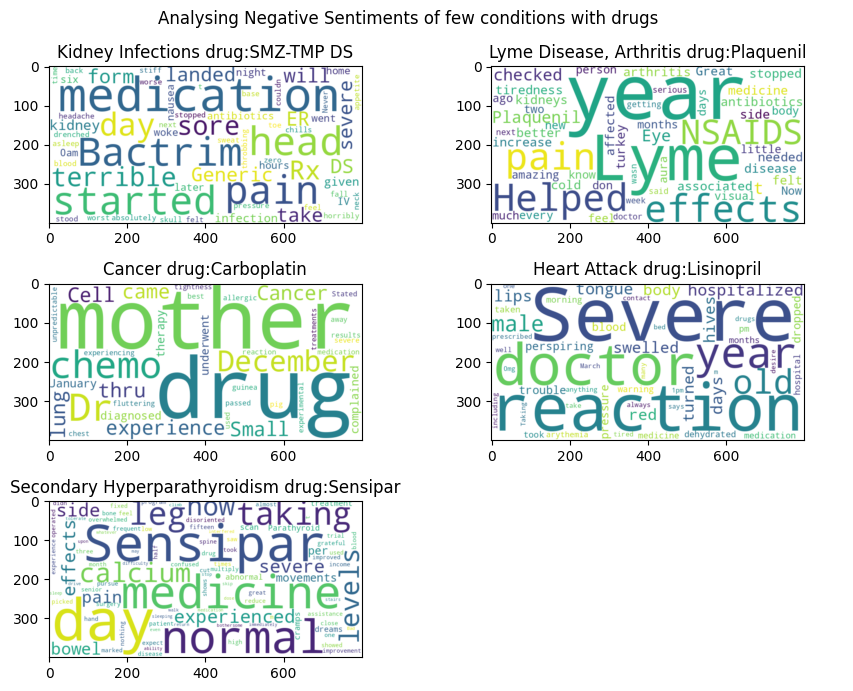

In [ ]:
fig,axs = plt.subplots(3,2,figsize=(9, 7))
r,c=  0,0
for cdn in negative_sentiment_drug_condition:
  txt = " ".join(df[(df['drugName']==negative_sentiment_drug_condition[cdn][0])&(df['condition']==cdn)&(df['Sentiment']==0)]['review'].values)
  # Create a WordCloud object
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(txt)

  # Display the WordCloud using matplotlib
  axs[r%3,c%2].imshow(wordcloud, interpolation='bilinear')
  title = cdn+" drug:"+negative_sentiment_drug_condition[cdn][0]
  axs[r%3,c%2].set_title(title)

  c+=1
  if c%2==0 and c>0:
    r+=1
  else:
    continue

axs[2,1].axis('off')
plt.suptitle("Analysing Negative Sentiments of few conditions with drugs")
plt.tight_layout()
plt.show()

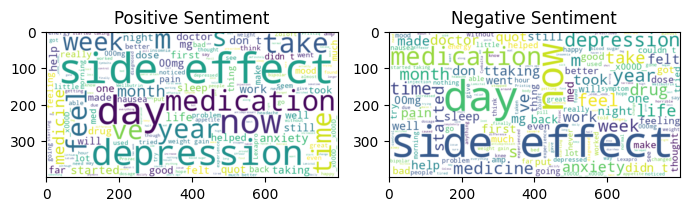

In [ ]:
#Word cloud analysis of positive and negative sentiment
fig,axs = plt.subplots(1,2,figsize=(7, 7))

txt = " ".join(df[df['Sentiment']==1]['review'].values)
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(txt)

# Display the WordCloud using matplotlib
axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].set_title("Positive Sentiment")


txt = " ".join(df[df['Sentiment']==0]['review'].values)
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(txt)

# Display the WordCloud using matplotlib
axs[1].imshow(wordcloud, interpolation='bilinear')
axs[1].set_title("Negative Sentiment")
plt.tight_layout()
plt.show()

## Inferences:
1. We have 25,485 records with no null values.
2. Top 5 drugs that are examined are 'Bupropion', 'Lamotrigine', 'Liraglutide','Levothyroxine', 'Sodium hyaluronate'.
3. Depression is the prevalant medical condition followed by Bi polar disorder.
4. With word cloud level analysis of top 5 drug and corresponding reviews. It also suggests that Bupropion is used for Depression, Liraglutide is used for diabetes etc.
5. Sentiment distribution is not balanced, with label 0 = 14,859 and label 1 = 10,986.
6. Analysing the Negative sentiments of few condition drugs it suggests some side affects of using those drugs for this condition.
7. Analysing the positive sentiments of few condition drugs it suggests no side affects of using those drugs for this condition.

## Text Preprocessing

1. Tokenization
2. Remove stop words
3. Stemming
4. Formulate Bag of Words

In [6]:
%%capture
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

StopWords = stopwords.words("english")
ps = PorterStemmer()
wnl = WordNetLemmatizer()

In [7]:
def Tokenisation(text,sep = " "):
  '''
  Function to tokenise the given text and lowercasing.
  ---------------------------------------
  :text : word sequence
  :sep : by default space character
  ---------------------------------------
  :return : list of words
  '''
  text = text.lower()
  text = re.sub('[^A-Za-z0-9]+', '', text)
  tokens = text.split(sep)

  return tokens


def RemoveStopWords(tokens):
  '''
  Function to remove stop words from the given text tokens.
  ---------------------------------------
  :tokens : list of words after tokenisation
  ---------------------------------------
  :return : list of words after removing stop words
  '''

  res = []
  for token in tokens:
    if token not in StopWords:
      res.append(token)
    else:
      continue

  return res

def Stemming(tokens):
  '''
  Function to perform stemmign from the given text tokens.
  ---------------------------------------
  :tokens : list of words after tokenisation
  ---------------------------------------
  :return : list of words after stemming
  '''

  res = []

  for token in tokens:
    res.append(wnl.lemmatize(token))

  return res

def BagOfWords(tokens,unique_tokens):
  '''
  Function to get bag of words from the given array of array tokens.
  ---------------------------------------
  :tokens : matrix of words after tokenisation
  :unique_tokens : array of unique words
  ---------------------------------------
  :return : vectorized format
  '''
  matrix = []
  for record in tokens:
    array = [0]*len(unique_tokens)
    for word in record:
      if word not in unique_tokens:
        continue
      else:
        array[unique_tokens.index(word)] = 1

    matrix.append(array)
  matrix = np.array(matrix)

  print("Shape of BOW Matrix:",matrix.shape)

  return matrix

In [8]:
#tokenisation
tokens = [Tokenisation(i) for i in list(df['review'].values)]

#Remove Stop words
removed_tokens = [RemoveStopWords(i) for i in tokens]

#lemmetization
stemmed_tokens = [Stemming(i) for i in removed_tokens]

#unique_tokens
unique = {}
for i in stemmed_tokens:
  for j in i:
    if j in unique:
      unique[j] += 1
    else:
      unique[j] = 1
final = dict(sorted(unique.items(), key=lambda item: item[1], reverse=True)[:3000])
unique = list(final.keys())
print("length of unique tokens:",len(unique))

length of unique tokens: 3000


In [9]:
BoW = BagOfWords(stemmed_tokens,list(unique))

Shape of BOW Matrix: (25845, 3000)


In [10]:
np.save("unique",unique)

In [11]:
#One hot encoding of drugName and condition
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
drug = enc.fit_transform(df[['drugName']])
drug = drug.toarray()

enc_c = OneHotEncoder(handle_unknown='ignore')
condition = enc_c.fit_transform(df[['condition']])
condition = condition.toarray()

In [18]:
X = np.append(drug,BoW,axis=1)
X = np.append(condition,X,axis=1)

In [19]:
y = np.array(df['Sentiment'].values)

In [20]:
print(X.shape,y.shape)

(25845, 3628) (25845,)


## Modelling

In [21]:
#Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
print("Train")
print("X train shape:",X_train.shape)
print("Test")
print("X test shape:",X_test.shape)

Train
X train shape: (18091, 3628)
Test
X test shape: (7754, 3628)


In [24]:
# Initialize classifiers
svm_classifier = SVC()
logreg_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()

# Train the models
logreg_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Make predictions
logreg_predictions = logreg_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)

# Evaluate the models
svm_accuracy = accuracy_score(y_test, svm_predictions)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Print the accuracies
print("SVM Accuracy:", svm_accuracy)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

# Choose the model with the highest accuracy
best_model = max([(logreg_accuracy, 'Logistic Regression'),
                  (knn_accuracy, 'KNN'), (nb_accuracy, 'Naive Bayes')])

print("Best Model:", best_model[1],"With accuracy:",best_model[0])

SVM Accuracy: 0.5740263090018055
Logistic Regression Accuracy: 0.6084601496002063
KNN Accuracy: 0.5484911013670364
Naive Bayes Accuracy: 0.5315965953056487
Best Model: Logistic Regression With accuracy: 0.6084601496002063


In [25]:
import joblib
# now you can save it to a file
joblib.dump(logreg_classifier, 'logreg_drug_sentiment.pkl')

['logreg_drug_sentiment.pkl']

## Model Performance Evaluation
1. Confusion Matrix
2. Precision
3. Recall
4. F1 Score
5. ROC Curve

In [ ]:
#Classification report
from sklearn.metrics import classification_report
print("classification_report - KNN Classifier")
print(classification_report(y_test, knn_predictions))
print()
print("classification_report - Naive Bayes Classifier")
print(classification_report(y_test, nb_predictions))
print()
print("classification_report - Logistic Regression Classifier")
print(classification_report(y_test, logreg_predictions))

classification_report - KNN Classifier
              precision    recall  f1-score   support

           0       0.59      0.62      0.61      4450
           1       0.46      0.43      0.45      3304

    accuracy                           0.54      7754
   macro avg       0.53      0.53      0.53      7754
weighted avg       0.54      0.54      0.54      7754


classification_report - Naive Bayes Classifier
              precision    recall  f1-score   support

           0       0.99      0.30      0.46      4450
           1       0.51      1.00      0.68      3304

    accuracy                           0.60      7754
   macro avg       0.75      0.65      0.57      7754
weighted avg       0.79      0.60      0.55      7754


classification_report - Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.63      0.88      0.73      4450
           1       0.65      0.31      0.42      3304

    accuracy                           

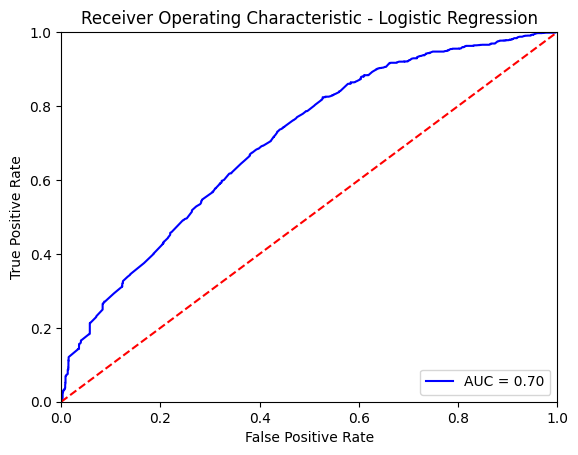

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg_classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

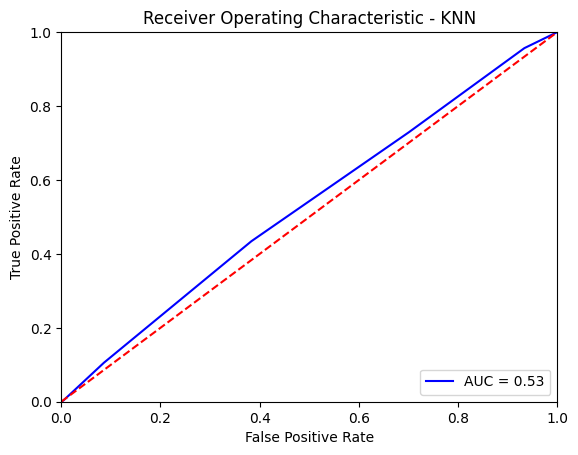

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = knn_classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

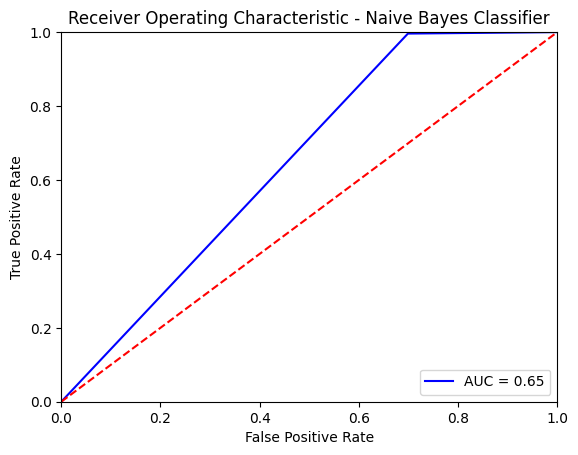

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = nb_classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - Naive Bayes Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
enc_d = OneHotEncoder(handle_unknown='ignore')
drug = enc_d.fit_transform(df[['drugName']])

features = list(enc_c.get_feature_names_out())+ list(enc_d.get_feature_names_out())
print(len(features))

628


In [32]:
np.save("onehot",features)

In [ ]:
print(X_train.shape)

(18091, 5628)


## Explainable AI

### LIME - Locally Interpretable Model Agnostic Explainability

In [ ]:
%%capture
!pip install lime

In [ ]:
import lime

In [ ]:
predict_prob_logreg = lambda x: logreg_classifier.predict_proba(x).astype(float)

In [ ]:
#taken onlu 10,000 of X train since the RAM of colab is limited and when i experimented with full data it crashed so taking just the sample
explainer = lime.lime_tabular.LimeTabularExplainer(X_train[:10000,:],feature_names=features,mode='classification',training_labels=[0,1])

In [ ]:
index = 2

In [ ]:
exp = explainer.explain_instance(X_test[index],predict_prob_logreg,num_features=5)

In [ ]:
exp.show_in_notebook(show_all=False)

In [ ]:
print("Actual label of ",index,"index row in ytest:",y_test[index])

Actual label of  2 index row in ytest: 0


<hr>
<hr>

In [ ]:
'''import pickle
with open("encoder.pickle", "wb") as f:
    pickle.dump(enc, f)

np.save("features",np.array(features))

import joblib
# now you can save it to a file
joblib.dump(logreg_classifier, 'logreg_drug_sentiment.pkl')
clf = joblib.load('logreg_drug_sentiment.pkl')
clf.predict(X_test[0].reshape(1,-1))'''